In [4]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import optimize
import sympy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
columnas=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26]
#f-score
#dataf = pd.read_csv("/content/drive/MyDrive/kp/homologia/tabla_fscore.txt",sep='\t',index_col=False)#,usecols=columnas)
dataf = pd.read_csv("/content/drive/MyDrive/kp/homologia/tabla_fscore_noS.txt",sep='\t',index_col=False,usecols=columnas)
dataf.describe()
#dataf.head(20)
#precisión
#datap = pd.read_csv("/content/drive/MyDrive/kp/maximizacion/tabla_precision.txt",sep='\t',usecols=columnas)
#datap.describe()
#recall
#datar = pd.read_csv("/content/drive/MyDrive/kp/maximizacion/tabla_recall.txt",sep='\t',usecols=columnas)
#datar.describe()

,ID,COV,ERR2929690,ERR2929692,SRR2244244,SRR3465532,SRR3465557,SRR4025861,SRR4245476,SRR5146463,SRR5167853,SRR5168236,SRR5168385,SRR5168393,SRR5168488,SRR5714002,SRR6348595,SRR6514141,SRR6514350,SRR6519357,SRR6675860,SRR8175017,SRR8607449,SRR8607459,SRR8668707,SRR8778550
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,89.500000,59.500000,0.512887,0.441661,0.653049,0.247470,0.591370,0.540687,0.396581,0.597131,0.720400,0.508906,0.615301,0.497135,0.750922,0.51261,0.513654,0.677837,0.683247,0.751072,0.583776,0.339979,0.657237,0.647724,0.491412,0.627860
std,5.768084,23.099426,0.086254,0.058545,0.052154,0.030367,0.053662,0.060024,0.055670,0.067790,0.046996,0.062474,0.054115,0.063260,0.061305,0.05801,0.036515,0.065181,0.046773,0.047757,0.051994,0.052614,0.049791,0.052733,0.072249,0.054992
min,80.000000,20.000000,0.400000,0.367800,0.581800,0.181800,0.477600,0.477100,0.321400,0.495200,0.655200,0.427200,0.544000,0.428600,0.662000,0.44040,0.466700,0.592200,0.619500,0.679600,0.513300,0.263200,0.600000,0.576600,0.384600,0.550000
25%,84.750000,39.750000,0.430400,0.390200,0.611500,0.235300,0.551700,0.490600,0.352900,0.536100,0.678600,0.453600,0.566700,0.439000,0.701500,0.46150,0.482800,0.619900,0.642200,0.707100,0.540825,0.285700,0.615400,0.598100,0.434800,0.571400
50%,89.500000,59.500000,0.507500,0.432400,0.644300,0.250000,0.603800,0.525300,0.391300,0.590900,0.708100,0.494400,0.601800,0.486500,0.752000,0.50000,0.509100,0.666700,0.679600,0.748700,0.574300,0.333300,0.644300,0.640000,0.476200,0.628600
75%,94.250000,79.250000,0.576300,0.470600,0.685700,0.266700,0.627500,0.584300,0.428600,0.634100,0.756250,0.557000,0.660200,0.545500,0.803400,0.55810,0.533300,0.722200,0.707100,0.782100,0.618675,0.384600,0.690600,0.680900,0.562500,0.677400
max,99.000000,99.000000,0.790700,0.653100,0.831900,0.444400,0.780500,0.764700,0.600000,0.812500,0.870200,0.688500,0.800000,0.692300,0.886800,0.71880,0.636400,0.892900,0.862500,0.907900,0.734200,0.526300,0.827600,0.800000,0.666700,0.777800


In [ ]:
f=dataf.iloc[:,2:]
mediaf=[]
for dat in (f.mean(axis=0))*100:
  mediaf.append(dat)
print(np.mean(mediaf))

56.4996111979167


In [7]:
nom=['ERR2929690','ERR2929692','SRR2244244','SRR3465532','SRR3465557','SRR4025861','SRR4245476','SRR5146463','SRR5167853','SRR5168236','SRR5168385','SRR5168393','SRR5168488','SRR5714002','SRR6348595','SRR6514141','SRR6514350','SRR6519357','SRR6675860','SRR8175017','SRR8607449','SRR8607459','SRR8607467','SRR8668707','SRR8778550']
#nom=[690,692,244,557,861,476,463,853,236,385,393,488,2,595,141,350,357,860,17,449,459,467,707,550]
coll=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
print(str(nom))

['ERR2929690', 'ERR2929692', 'SRR2244244', 'SRR3465532', 'SRR3465557', 'SRR4025861', 'SRR4245476', 'SRR5146463', 'SRR5167853', 'SRR5168236', 'SRR5168385', 'SRR5168393', 'SRR5168488', 'SRR5714002', 'SRR6348595', 'SRR6514141', 'SRR6514350', 'SRR6519357', 'SRR6675860', 'SRR8175017', 'SRR8607449', 'SRR8607459', 'SRR8607467', 'SRR8668707', 'SRR8778550']


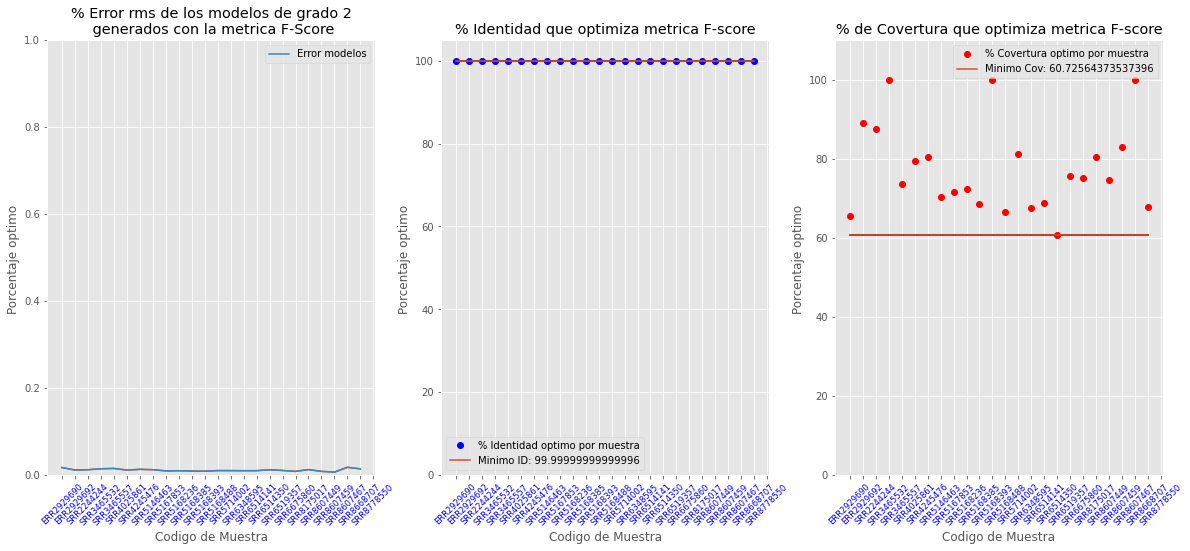

In [13]:
tabla_maximosf=[]
Error_modelosf=[]
grado=PolynomialFeatures(degree=2)
for col in range(2,26):
  #print(col)
  #print(data.iloc[:,col])
  X_train, X_test, y_train, y_test = train_test_split(dataf.iloc[:,:2], dataf.iloc[:,col], test_size=0.33, random_state=42)
  x_train_p=grado.fit_transform(X_train)
  x_test_p=grado.fit_transform(X_test)
  #print(x_test_p[0])
  X_t = sm.add_constant(x_train_p, prepend=True)
  modelo = sm.OLS(endog=y_train, exog=X_t,)
  modelo = modelo.fit()
  #print(modelo.params[:6])
  coef=modelo.params[:6]
  X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
  predicciones = modelo.predict(exog = X_te)
  rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
  #print(f"El error (rmse) de test es: {rmse}")
  Error_modelosf.append(rmse)
  def f(x):
    return -(coef[0]+coef[1]*x[0]+coef[2]*x[1]+coef[3]*x[0]**2+coef[4]*x[1]**2+coef[5]*x[0]*x[1])
  optimo=optimize.minimize(f,(95,70),method='SLSQP',tol=1e-10,bounds=((80,100),(20,100)))
  #print(optimo.fun)
  #print(optimo.x)
  tabla_maximosf.append(optimo.x)
#print(Error_modelosf)
#print(tabla_maximosf)
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.plot(Error_modelosf)
plt.title("% Error rms de los modelos de grado 2\n generados con la metrica F-Score")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(Error_modelosf, label = "Error modelos")
plt.ylim(0,1)
plt.legend()
plt.subplot(1,3,2,)
identidad=[]
covertura=[]
for t in tabla_maximosf:
  identidad.append(t[0])
  covertura.append(t[1])


mediaid=(np.ones_like(identidad))*(np.amin(identidad))
plt.plot(mediaid,'k')
plt.title("% Identidad que optimiza metrica F-score")
plt.xlabel("Codigo de Muestra")  
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.ylim(0,105)
plt.plot(identidad,'bo', label = "% Identidad optimo por muestra")
plt.plot(mediaid, label = "Minimo ID: "+str(mediaid[0]))
plt.legend()
plt.subplot(1,3,3)
mediacov=(np.ones_like(covertura))*(np.amin(covertura))
plt.plot(mediacov,'k')
plt.title("% de Covertura que optimiza metrica F-score")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.ylim(0,110)
plt.plot(covertura,'ro', label = "% Covertura optimo por muestra")
plt.plot(mediacov, label = "Minimo Cov: "+str(mediacov[0]))
plt.legend()
####


In [ ]:
tabla_maximosp=[]
Error_modelosp=[]
grado=PolynomialFeatures(degree=2)
for col in range(2,27):
  #print(col)
  #print(data.iloc[:,col])
  X_train, X_test, y_train, y_test = train_test_split(datap.iloc[:,:2], datap.iloc[:,col], test_size=0.33, random_state=42)
  x_train_p=grado.fit_transform(X_train)
  x_test_p=grado.fit_transform(X_test)
  #print(x_test_p[0])
  X_t = sm.add_constant(x_train_p, prepend=True)
  modelo = sm.OLS(endog=y_train, exog=X_t,)
  modelo = modelo.fit()
  #print(modelo.params[:6])
  coef=modelo.params[:6]
  X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
  predicciones = modelo.predict(exog = X_te)
  rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
  #print(f"El error (rmse) de test es: {rmse}")
  Error_modelosp.append(rmse)
  def f(x):
    return -(coef[0]+coef[1]*x[0]+coef[2]*x[1]+coef[3]*x[0]**2+coef[4]*x[1]**2+coef[5]*x[0]*x[1])
  optimo=optimize.minimize(f,(95,70),method='SLSQP',tol=1e-10,bounds=((80,100),(20,100)))
  #print(optimo.fun)
  #print(optimo.x)
  tabla_maximosp.append(optimo.x)
#print(Error_modelosp)
#print(tabla_maximosp)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(Error_modelosp)
plt.title("%Error rms de los modelos de grado 2 generados con la metrica Precisión ")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(Error_modelosp, label = "Error modelos")
plt.ylim(0,1)
plt.legend()
plt.subplot(1,2,2)
identidad=[]
covertura=[]
for t in tabla_maximosp:
  identidad.append(t[0])
  covertura.append(t[1])
plt.plot(identidad)
plt.plot(covertura)
mediaid=(np.ones_like(identidad))*(np.sum(identidad)/len(identidad))
plt.plot(mediaid)
mediacov=(np.ones_like(covertura))*(np.sum(covertura)/len(covertura))
plt.plot(mediacov)
plt.title("Valores Optimos de %Identidad y %Covertura, Precisión")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(identidad, label = "% Identidad")
plt.plot(covertura, label = "% Covertura")
plt.plot(mediaid, label = "Media ID: "+str(mediaid[0]))
plt.plot(mediacov, label = "Media Cov: "+str(mediacov[0]))
plt.legend()

NameError: ignored

In [ ]:
tabla_maximosr=[]
Error_modelosr=[]
grado=PolynomialFeatures(degree=2)
for col in range(2,26):
  #print(col)
  #print(data.iloc[:,col])
  X_train, X_test, y_train, y_test = train_test_split(datar.iloc[:,:2], datar.iloc[:,col], test_size=0.33, random_state=42)
  x_train_p=grado.fit_transform(X_train)
  x_test_p=grado.fit_transform(X_test)
  #print(x_test_p[0])
  X_t = sm.add_constant(x_train_p, prepend=True)
  modelo = sm.OLS(endog=y_train, exog=X_t,)
  modelo = modelo.fit()
  #print(modelo.params[:6])
  coef=modelo.params[:6]
  X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
  predicciones = modelo.predict(exog = X_te)
  rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
  #print(f"El error (rmse) de test es: {rmse}")
  Error_modelosr.append(rmse)

  def f(x):
    return -(coef[0]+coef[1]*x[0]+coef[2]*x[1]+coef[3]*x[0]**2+coef[4]*x[1]**2+coef[5]*x[0]*x[1])
  optimo=optimize.minimize(f,(95,70),method='SLSQP',tol=1e-10,bounds=((80,100),(20,100)))
  #print(optimo.fun)
  #print(optimo.x)
  tabla_maximosr.append(optimo.x)
#print(Error_modelosr)
#print(tabla_maximosr)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(Error_modelosr)
plt.title("Error rms de los modelos de grado 2 generados con la metrica Recall")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(Error_modelosr, label = "Error modelos")
plt.ylim(0,1)
plt.legend()
plt.subplot(1,2,2)
identidad=[]
covertura=[]
for t in tabla_maximosr:
  identidad.append(t[0])
  covertura.append(t[1])
plt.plot(identidad)
plt.plot(covertura)
mediaid=(np.ones_like(identidad))*(np.sum(identidad)/len(identidad))
plt.plot(mediaid)
mediacov=(np.ones_like(covertura))*(np.sum(covertura)/len(covertura))
plt.plot(mediacov)
plt.title("Valores Optimos de %Identidad y %Covertura, Recall")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(identidad, label = "% Identidad")
plt.plot(covertura, label = "% Covertura")
plt.plot(mediaid, label = "Media ID: "+str(mediaid[0]))
plt.plot(mediacov, label = "Media Cov: "+str(mediacov[0]))
plt.legend()

-0.8797367830909654
[100.          71.48502604]


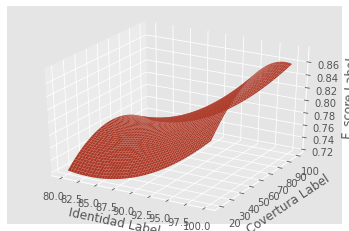

In [ ]:
col=10
X_train, X_test, y_train, y_test = train_test_split(dataf.iloc[:,:2], dataf.iloc[:,col], test_size=0.33, random_state=42)
x_train_p=grado.fit_transform(X_train)
x_test_p=grado.fit_transform(X_test)
#print(x_test_p[0])
X_t = sm.add_constant(x_train_p, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_t,)
modelo = modelo.fit()
#print(modelo.params[:6])
coef=modelo.params[:6]
X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
predicciones = modelo.predict(exog = X_te)
rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
#print(f"El error (rmse) de test es: {rmse}")
Error_modelosf.append(rmse)
def f(x):
  return -(coef[0]+coef[1]*x[0]+coef[2]*x[1]+coef[3]*x[0]**2+coef[4]*x[1]**2+coef[5]*x[0]*x[1])
optimo=optimize.minimize(f,(95,70),method='SLSQP',tol=1e-10,bounds=((80,100),(20,100)))
print(optimo.fun)
print(optimo.x)
#graficar funcion
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(80, 100, 0.05)
y = np.arange(20, 100, 0.05)
#x = y = np.arange(0, 100, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([-f((x,y)) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Identidad Label')
ax.set_ylabel('Covertura Label')
ax.set_zlabel('F_score Label')
#ax.plot(,)
plt.show()

In [ ]:
columnas=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
#f-score
dataf = pd.read_csv("/content/drive/MyDrive/kp/maximizacion/tabla_fscore236.txt",sep='\t',usecols=columnas)
dataf.describe()


,ID,COV,ERR2929690,ERR2929692,SRR2244244,SRR3465557,SRR4025861,SRR4245476,SRR5146463,SRR5167853,SRR5168236,SRR5168385,SRR5168393,SRR5168488,SRR5714002,SRR6348595,SRR6514141,SRR6514350,SRR6519357,SRR6675860,SRR8175017,SRR8607449,SRR8607459,SRR8607467,SRR8668707,['SRR8778550']
count,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.0,1600.0,1600.0
mean,89.500000,59.500000,1.0,0.997500,0.980146,0.736137,0.970525,1.0,0.942878,0.973582,0.963583,0.997637,0.975968,0.986750,0.951171,0.958150,0.997830,0.981125,0.969560,0.998215,1.0,0.928529,0.982956,1.0,1.0,1.0
std,5.768084,23.099426,0.0,0.010901,0.023852,0.122595,0.014679,0.0,0.043253,0.019191,0.036614,0.007810,0.052519,0.017596,0.020486,0.015392,0.006512,0.019947,0.016673,0.009046,0.0,0.039493,0.035490,0.0,0.0,0.0
min,80.000000,20.000000,1.0,0.950000,0.894700,0.555600,0.928600,1.0,0.857100,0.919400,0.857100,0.945900,0.769200,0.940000,0.875000,0.942900,0.978300,0.925000,0.910400,0.952400,1.0,0.846200,0.909100,1.0,1.0,1.0
25%,84.750000,39.750000,1.0,1.000000,0.964900,0.666700,0.964300,1.0,0.904800,0.951600,0.942900,1.000000,1.000000,0.980000,0.958300,0.942900,1.000000,0.962500,0.955200,1.000000,1.0,0.903800,1.000000,1.0,1.0,1.0
50%,89.500000,59.500000,1.0,1.000000,0.982500,0.666700,0.964300,1.0,0.952400,0.967700,0.971400,1.000000,1.000000,1.000000,0.958300,0.971400,1.000000,0.987500,0.970100,1.000000,1.0,0.923100,1.000000,1.0,1.0,1.0
75%,94.250000,79.250000,1.0,1.000000,1.000000,0.777800,0.964300,1.0,1.000000,0.983900,1.000000,1.000000,1.000000,1.000000,0.958300,0.971400,1.000000,1.000000,0.985100,1.000000,1.0,0.961500,1.000000,1.0,1.0,1.0
max,99.000000,99.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.958300,1.000000,1.000000,1.000000,0.985100,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0


In [ ]:
nom=['ERR2929690','ERR2929692','SRR2244244','SRR3465557','SRR4025861','SRR4245476','SRR5146463','SRR5167853','SRR5168236','SRR5168385','SRR5168393','SRR5168488','SRR5714002','SRR6348595','SRR6514141','SRR6514350','SRR6519357','SRR6675860','SRR8175017','SRR8607449','SRR8607459','SRR8607467','SRR8668707','SRR8778550']
#nom=[690,692,244,557,861,476,463,853,236,385,393,488,2,595,141,350,357,860,17,449,459,467,707,550]
coll=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
print(str(nom))

['ERR2929690', 'ERR2929692', 'SRR2244244', 'SRR3465557', 'SRR4025861', 'SRR4245476', 'SRR5146463', 'SRR5167853', 'SRR5168236', 'SRR5168385', 'SRR5168393', 'SRR5168488', 'SRR5714002', 'SRR6348595', 'SRR6514141', 'SRR6514350', 'SRR6519357', 'SRR6675860', 'SRR8175017', 'SRR8607449', 'SRR8607459', 'SRR8607467', 'SRR8668707', 'SRR8778550']


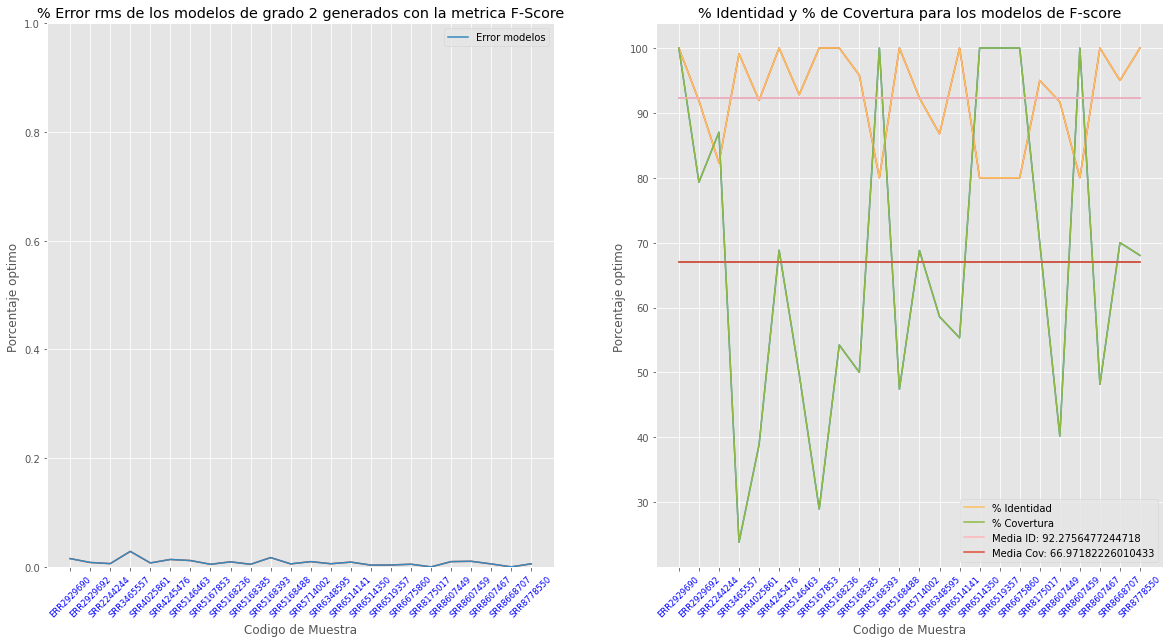

In [ ]:
tabla_maximosf=[]
Error_modelosf=[]
grado=PolynomialFeatures(degree=2)
for col in range(2,26):
  #print(col)
  #print(data.iloc[:,col])
  X_train, X_test, y_train, y_test = train_test_split(dataf.iloc[:,:2], dataf.iloc[:,col], test_size=0.33, random_state=42)
  x_train_p=grado.fit_transform(X_train)
  x_test_p=grado.fit_transform(X_test)
  #print(x_test_p[0])
  X_t = sm.add_constant(x_train_p, prepend=True)
  modelo = sm.OLS(endog=y_train, exog=X_t,)
  modelo = modelo.fit()
  #print(modelo.params[:6])
  coef=modelo.params[:6]
  X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
  predicciones = modelo.predict(exog = X_te)
  rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
  #print(f"El error (rmse) de test es: {rmse}")
  Error_modelosf.append(rmse)
  def f(x):
    return -(coef[0]+coef[1]*x[0]+coef[2]*x[1]+coef[3]*x[0]**2+coef[4]*x[1]**2+coef[5]*x[0]*x[1])
  optimo=optimize.minimize(f,(95,70),method='SLSQP',tol=1e-10,bounds=((80,100),(20,100)))
  #print(optimo.fun)
  #print(optimo.x)
  tabla_maximosf.append(optimo.x)
#print(Error_modelosf)
#print(tabla_maximosf)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(Error_modelosf)
plt.title("% Error rms de los modelos de grado 2 generados con la metrica F-Score")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(Error_modelosf, label = "Error modelos")
plt.ylim(0,1)
plt.legend()
plt.subplot(1,2,2,)
identidad=[]
covertura=[]
for t in tabla_maximosf:
  identidad.append(t[0])
  covertura.append(t[1])

plt.plot(identidad)
plt.plot(covertura)
#plt.plot(mediaf)
mediaid=(np.ones_like(identidad))*(np.sum(identidad)/len(identidad))
plt.plot(mediaid)
mediacov=(np.ones_like(covertura))*(np.sum(covertura)/len(covertura))
plt.plot(mediacov)
plt.title("% Identidad y % de Covertura para los modelos de F-score")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(identidad, label = "% Identidad")
plt.plot(covertura, label = "% Covertura")
plt.plot(mediaid, label = "Media ID: "+str(mediaid[0]))
plt.plot(mediacov, label = "Media Cov: "+str(mediacov[0]))
plt.legend()


-0.9676578950227106
[100.          54.22808758]


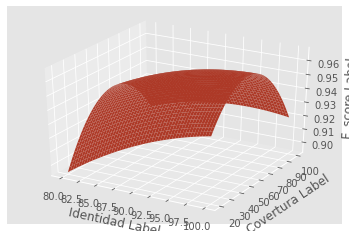

In [ ]:
col=10
X_train, X_test, y_train, y_test = train_test_split(dataf.iloc[:,:2], dataf.iloc[:,col], test_size=0.33, random_state=42)
x_train_p=grado.fit_transform(X_train)
x_test_p=grado.fit_transform(X_test)
#print(x_test_p[0])
X_t = sm.add_constant(x_train_p, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_t,)
modelo = modelo.fit()
#print(modelo.params[:6])
coef=modelo.params[:6]
X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
predicciones = modelo.predict(exog = X_te)
rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
#print(f"El error (rmse) de test es: {rmse}")
Error_modelosf.append(rmse)
def f(x):
  return -(coef[0]+coef[1]*x[0]+coef[2]*x[1]+coef[3]*x[0]**2+coef[4]*x[1]**2+coef[5]*x[0]*x[1])
optimo=optimize.minimize(f,(95,70),method='SLSQP',tol=1e-10,bounds=((80,100),(20,100)))
print(optimo.fun)
print(optimo.x)
#graficar funcion
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(80, 100, 0.05)
y = np.arange(20, 100, 0.05)
#x = y = np.arange(0, 100, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([-f((x,y)) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Identidad Label')
ax.set_ylabel('Covertura Label')
ax.set_zlabel('F_score Label')
#ax.plot(,)
plt.show()

In [ ]:
columnas=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
#f-score
dataf = pd.read_csv("/content/drive/MyDrive/kp/maximizacion/tabla_fscore557.txt",sep='\t',usecols=columnas)
dataf.describe()


,ID,COV,ERR2929690,ERR2929692,SRR2244244,SRR3465557,SRR4025861,SRR4245476,SRR5146463,SRR5167853,SRR5168236,SRR5168385,SRR5168393,SRR5168488,SRR5714002,SRR6348595,SRR6514141,SRR6514350,SRR6519357,SRR6675860,SRR8175017,SRR8607449,SRR8607459,SRR8607467,SRR8668707,['SRR8778550']
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.0,1600.000000
mean,89.500000,59.500000,0.941364,0.983521,0.985489,0.940404,0.980226,0.916430,0.957165,0.979215,0.943833,0.964241,0.976447,0.978182,0.934170,0.976193,0.935756,0.987665,0.878432,0.951734,1.0,0.951935,0.985094,0.993590,1.0,0.998988
std,5.768084,23.099426,0.032735,0.019791,0.011537,0.088506,0.009873,0.035176,0.014652,0.009814,0.017287,0.011558,0.029274,0.013305,0.016774,0.007310,0.024044,0.008825,0.005306,0.007338,0.0,0.014665,0.021520,0.010064,0.0,0.006867
min,80.000000,20.000000,0.923100,0.930200,0.944400,0.666700,0.933300,0.896600,0.923100,0.958000,0.909100,0.925000,0.869600,0.943400,0.884600,0.956500,0.876200,0.961000,0.853100,0.930200,1.0,0.916700,0.952400,0.977800,1.0,0.952400
25%,84.750000,39.750000,0.923100,0.975600,0.982100,0.909100,0.981800,0.896600,0.950000,0.975200,0.929600,0.960000,0.963000,0.970300,0.920000,0.970600,0.920000,0.980900,0.876700,0.954500,1.0,0.940000,0.956500,0.977800,1.0,1.000000
50%,89.500000,59.500000,0.923100,1.000000,0.991200,1.000000,0.981800,0.896600,0.950000,0.976000,0.942900,0.973700,1.000000,0.979600,0.938800,0.971400,0.947400,0.987700,0.878400,0.954500,1.0,0.949500,1.000000,1.000000,1.0,1.000000
75%,94.250000,79.250000,0.923100,1.000000,0.991300,1.000000,0.981800,0.928600,0.975600,0.984100,0.956500,0.973700,1.000000,0.989900,0.938800,0.985500,0.958300,0.993700,0.880000,0.954500,1.0,0.961500,1.000000,1.000000,1.0,1.000000
max,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.976700,1.000000,0.985900,0.973700,1.000000,1.000000,0.958300,0.985900,0.958300,1.000000,0.885900,0.954500,1.0,0.980800,1.000000,1.000000,1.0,1.000000


In [ ]:
nom=['ERR2929690','ERR2929692','SRR2244244','SRR3465557','SRR4025861','SRR4245476','SRR5146463','SRR5167853','SRR5168236','SRR5168385','SRR5168393','SRR5168488','SRR5714002','SRR6348595','SRR6514141','SRR6514350','SRR6519357','SRR6675860','SRR8175017','SRR8607449','SRR8607459','SRR8607467','SRR8668707','SRR8778550']
#nom=[690,692,244,557,861,476,463,853,236,385,393,488,2,595,141,350,357,860,17,449,459,467,707,550]
coll=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
print(str(nom))

['ERR2929690', 'ERR2929692', 'SRR2244244', 'SRR3465557', 'SRR4025861', 'SRR4245476', 'SRR5146463', 'SRR5167853', 'SRR5168236', 'SRR5168385', 'SRR5168393', 'SRR5168488', 'SRR5714002', 'SRR6348595', 'SRR6514141', 'SRR6514350', 'SRR6519357', 'SRR6675860', 'SRR8175017', 'SRR8607449', 'SRR8607459', 'SRR8607467', 'SRR8668707', 'SRR8778550']


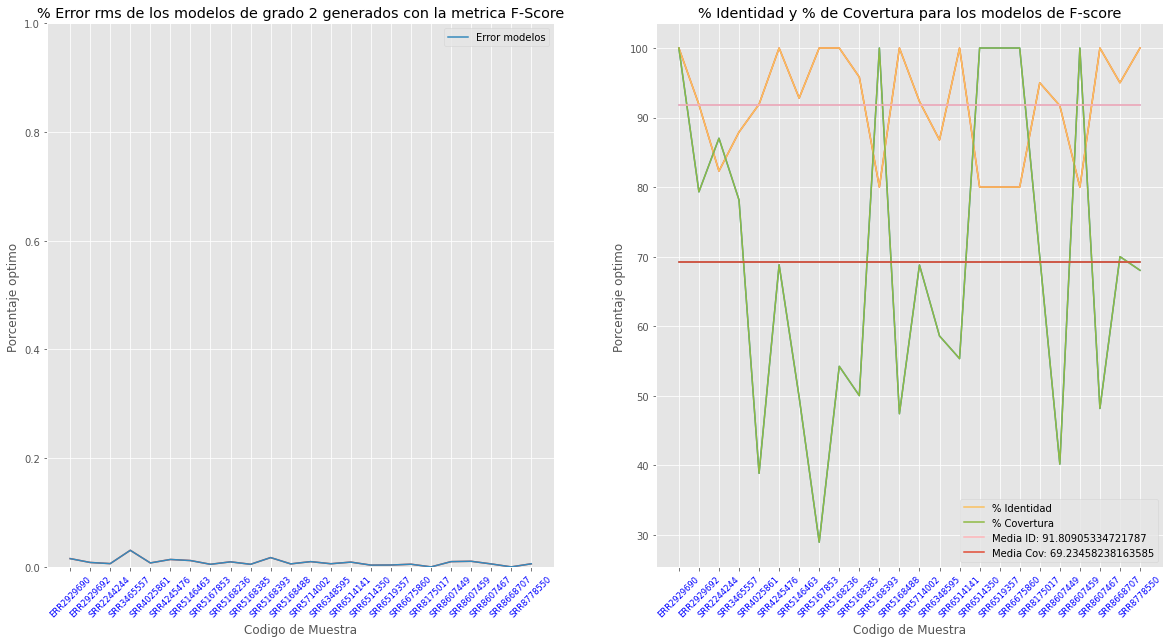

In [ ]:
tabla_maximosf=[]
Error_modelosf=[]
grado=PolynomialFeatures(degree=2)
for col in range(2,26):
  #print(col)
  #print(data.iloc[:,col])
  X_train, X_test, y_train, y_test = train_test_split(dataf.iloc[:,:2], dataf.iloc[:,col], test_size=0.33, random_state=42)
  x_train_p=grado.fit_transform(X_train)
  x_test_p=grado.fit_transform(X_test)
  #print(x_test_p[0])
  X_t = sm.add_constant(x_train_p, prepend=True)
  modelo = sm.OLS(endog=y_train, exog=X_t,)
  modelo = modelo.fit()
  #print(modelo.params[:6])
  coef=modelo.params[:6]
  X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
  predicciones = modelo.predict(exog = X_te)
  rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
  #print(f"El error (rmse) de test es: {rmse}")
  Error_modelosf.append(rmse)
  def f(x):
    return -(coef[0]+coef[1]*x[0]+coef[2]*x[1]+coef[3]*x[0]**2+coef[4]*x[1]**2+coef[5]*x[0]*x[1])
  optimo=optimize.minimize(f,(95,70),method='SLSQP',tol=1e-10,bounds=((80,100),(20,100)))
  #print(optimo.fun)
  #print(optimo.x)
  tabla_maximosf.append(optimo.x)
#print(Error_modelosf)
#print(tabla_maximosf)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(Error_modelosf)
plt.title("% Error rms de los modelos de grado 2 generados con la metrica F-Score")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(Error_modelosf, label = "Error modelos")
plt.ylim(0,1)
plt.legend()
plt.subplot(1,2,2,)
identidad=[]
covertura=[]
for t in tabla_maximosf:
  identidad.append(t[0])
  covertura.append(t[1])

plt.plot(identidad)
plt.plot(covertura)
#plt.plot(mediaf)
mediaid=(np.ones_like(identidad))*(np.sum(identidad)/len(identidad))
plt.plot(mediaid)
mediacov=(np.ones_like(covertura))*(np.sum(covertura)/len(covertura))
plt.plot(mediacov)
plt.title("% Identidad y % de Covertura para los modelos de F-score")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(identidad, label = "% Identidad")
plt.plot(covertura, label = "% Covertura")
plt.plot(mediaid, label = "Media ID: "+str(mediaid[0]))
plt.plot(mediacov, label = "Media Cov: "+str(mediacov[0]))
plt.legend()


In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_t = sm.add_constant(x_train_p, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_t,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      2   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           7.10e-88
Time:                        22:39:24   Log-Likelihood:                 1285.9
No. Observations:                 268   AIC:                            -2560.
Df Residuals:                     262   BIC:                            -2538.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3105      0.156      1.994      0.0

In [ ]:
# Error de test del modelo 
# ==============================================================================
X_te = sm.add_constant(x_test_p, prepend=True)
predicciones = modelo.predict(exog = X_te)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.0023153937242610914


In [ ]:
print(modelo.predict())

53.019255944278015


In [ ]:
print(predicciones[:10])
print(y_test[:10])

[0.27253237 0.2374417  0.24094574 0.2940833  0.29685344 0.26069158
 0.23862675 0.23818025 0.24515857 0.32723842]
361    0.2500
73     0.2500
374    0.2500
155    0.2500
104    0.2500
394    0.2609
377    0.2500
124    0.2500
68     0.2500
450    0.4737
Name: 2, dtype: float64


In [ ]:
def f(x):
  return -(0.3105-0.0012*x[0]-0.0003*x[1]+6.555e-06*x[0]**2-1.516e-06*x[1]**2+4.881e-06*x[0]*x[1])

  #return modelo.predict(np.reshape(grado.fit_transform(x),(-1,1)))

In [ ]:

optimo=optimize.minimize(f,(90,40),method='TNC',tol=1e-10,bounds=((90,100),(20,100)))
print(optimo)

     fun: -0.26188469821893756
     jac: array([-0.00041381,  0.        ])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 17
     nit: 5
  status: 1
 success: True
       x: array([100.        ,  62.03845719])


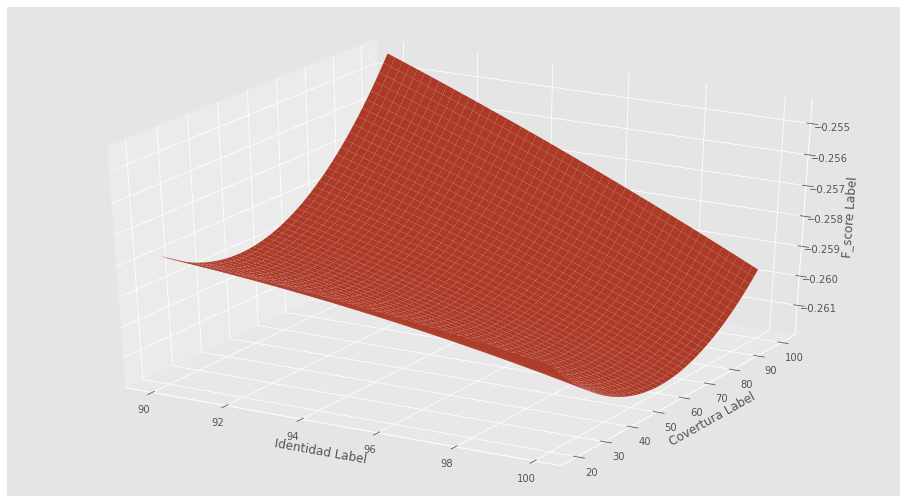

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(90, 100, 0.05)
y = np.arange(20, 100, 0.05)
#x = y = np.arange(0, 100, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([f((x,y)) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Identidad Label')
ax.set_ylabel('Covertura Label')
ax.set_zlabel('F_score Label')
#ax.plot(,)
plt.show()

In [ ]:
print(f(optimo.x))

-0.26188469821893756
